In [1]:
import time
import datetime
import pytz
import glob

import numpy as np
import pandas as pd
import geopandas as gpd
import yaml

import pylab
from colour import Color
from pylab import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from bigbang import listserv
from bigbang.listserv import ListservArchive, ListservList, ListservMessageParser
from analysis.listserv import ListservArchive as MArchive
from analysis.listserv import ListservList as MList

plt.style.use("publication_jcap.mplstyle")

In [2]:
mlist_name = "3GPP_TSG_SA_WG4"
mlist = ListservList.from_mbox(
    name=mlist_name,
    filepath=f"/home/christovis/AGE/datactive/bigbang-archives/3GPP/{mlist_name}.mbox",
)
df_mlist = mlist.to_pandas_dataframe(include_body=False)
utcoffsets_hm = MList.get_messagecount_per_timezone(df_mlist)

# utcoffsets = [dt.utcoffset() for dt in df_mlist['date'].values]

In [3]:
# Crone, James. (2017). World Timezones, [Dataset]. University of Edinburgh. https://doi.org/10.7488/ds/1871

world_tz = gpd.read_file("./ancillary_data/world_timezones.shp")
world_tz = world_tz[world_tz["TZID"] != "uninhabited"]

In [4]:
# Translate from df_mlist to world_tz DataFrame
dic_trans = {}
for tz in set(world_tz["UTC_OFFSET"]):
    if not tz:
        continue
    elif "±0" in tz:
        dic_trans[tz] = utcoffsets_hm["+00:00"]
    elif ("UTC-" in tz) or ("UTC+" in tz):
        _tz = tz.replace("UTC", "")
        if _tz in list(utcoffsets_hm.keys()):
            dic_trans[tz] = utcoffsets_hm[_tz]
        else:
            dic_trans[tz] = 0

# add counts per timezone to geopandas DataFrame
nr_msgs = [
    dic_trans[UTC_OFFSET] if UTC_OFFSET else 0
    for UTC_OFFSET in world_tz["UTC_OFFSET"].values
]
world_tz["Message_Nr"] = nr_msgs

'plt.savefig(\n    f"{mlist_name}_msgs_tz.png",\n    format=\'png\',\n    transparent=True,\n    dpi=300,\n    bbox_inches=\'tight\',\n)\nplt.show()'

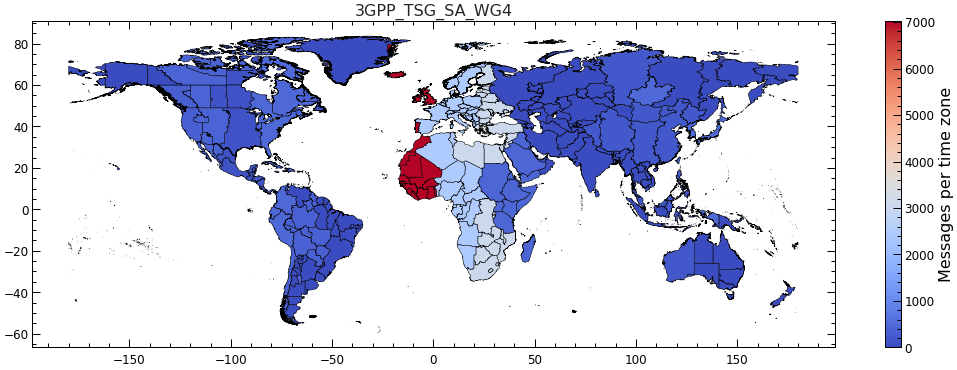

In [5]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(18, 6),
    facecolor="w",
    edgecolor="k",
)

world_tz.plot(
    column="Message_Nr",
    ax=ax,
    cmap="coolwarm",
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    legend_kwds={"label": "Messages per time zone"},
)
ax.set_title(mlist_name)

"""plt.savefig(
    f"{mlist_name}_msgs_tz.png",
    format='png',
    transparent=True,
    dpi=300,
    bbox_inches='tight',
)
plt.show()"""